# Project 4 : Investigate a Dataset

# Titanic - Data:

## By: B.Bharath

## Titanic - Dataset:

Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.

## Task:

Brainstorm some questions using the data given, then start answering those questions. For example:

* Titanic Data
* What factors made people more likely to survive?

## TOC:
* [PClass](#first-bullet)
* [Age and sex](#second-bullet)

## Image of Titanic:

In [27]:
from IPython.display import Image
Image(url="http://thespiritscience.net/wp-content/uploads/2016/06/Titanic-sinking.jpg")

In [20]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [21]:
data = pd.read_csv('titanic-data.csv')

In [22]:
data.shape

(891, 12)

The table contains records of 891 passengers and 12 coloumns of other data.

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note: We choose to drop cabin column because of missing values because it's better to clean the values before analysing it and so that we can focus more on parameters like 'Class' or 'Sex'. We could replace the missing values of mean since we assume that it's distributed evenly among the records, and values in cabin could be replaced with the median since they're assigned at random.

In [24]:
chosen_data = data.loc[:,['Survived', 'Pclass', 'Fare', 'Sex', 'Age']]
clean_data = chosen_data.dropna()

In [25]:
clean_data.shape

(714, 5)

In [26]:
clean_data.corr()

,Survived,Pclass,Fare,Age
Survived,1.000000,-0.359653,0.268189,-0.077221
Pclass,-0.359653,1.000000,-0.554182,-0.369226
Fare,0.268189,-0.554182,1.000000,0.096067
Age,-0.077221,-0.369226,0.096067,1.000000


714 records remain. We'll look at the reationship between each coloumn in the dataset.
Class 3 had maximum population.
Our 1st question: Is PClass related to chance of survival?
Our correlation coefficient between Pclass and Fare is -0.55 which indicates that the lower the Pclass, the higher the Fare passengers pay. Let's look at the chart below to get a better understanding of this relation.

## PClass:

### Visual representation of ticket fares for classes 1, 2 and 3:

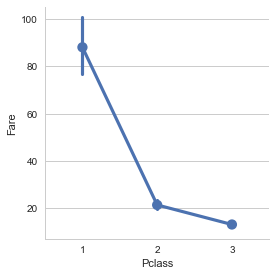

In [28]:
sns.factorplot(data=clean_data, x='Pclass', y='Fare')
plt.show()

Now, we observe that Class1 has highest fares which suggests that Class1 has the richest passengers. Were the passengers in Class1 saved first by means of using lifeboats or lifeguard suits as they were in the most sophisticated class and rich? Our dataset is split into three to find this.

In [48]:
survived=clean_data[clean_data['Survived']==1]
dead=clean_data[clean_data['Survived']==0]

In [55]:
group1 = clean_data[clean_data['Pclass']==1]
group2 = clean_data[clean_data['Pclass']==2]
group3 = clean_data[clean_data['Pclass']==3]
group1['Survived'].mean(), group2['Survived'].mean(), group3['Survived'].mean()

(0.6559139784946236, 0.4797687861271676, 0.23943661971830985)

It is clear from this data that the parameter PClass has it's effect on the survival of passengers, and that lower the class, higher the survival percentage.

## Age and sex: 

Do age and sex have any effect on the survival percentage? Below is a visualisation relating survival amount and age, sex.

### Proportion of survival by gender:

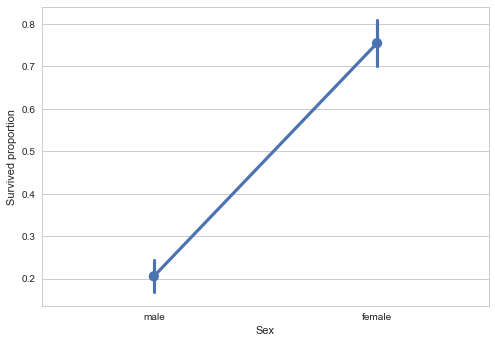

In [31]:
sns.pointplot(x='Sex', y='Survived', data=clean_data);
plt.ylabel('Survived proportion')
plt.show()

Significant difference can be observed beteween the numer of men and women survived. This could have been because women were allowed to escape before men, or that women occupied most of Class1

In [32]:
print('The proportion of male/female in class 1:')
group1.groupby('Sex').size() * 100 / group1.shape[0]

The proportion of male/female in class 1:


Sex
female    45.698925
male      54.301075
dtype: float64

In [33]:
print('The proportion of male/female in class 2:')
group2.groupby('Sex').size() * 100 / group2.shape[0]

The proportion of male/female in class 2:


Sex
female    42.774566
male      57.225434
dtype: float64

In [35]:
print('The proportion of male/female in class 3:')
group3.groupby('Sex').size() * 100 / group3.shape[0]

The proportion of male/female in class 3:


Sex
female    28.732394
male      71.267606
dtype: float64

In [36]:
survived=clean_data[clean_data['Survived']==1]
dead=clean_data[clean_data['Survived']==0]

### Frequency distribution of survived passengers by age:

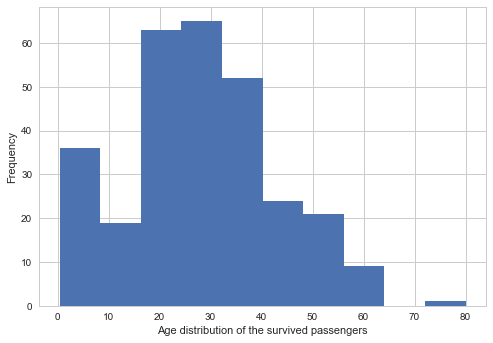

In [37]:
def makehist(column_data, xlabel):
    plt.hist(column_data)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
makehist(survived['Age'],'Age distribution of the survived passengers')

### Frequency distribution of dead passengers by age:

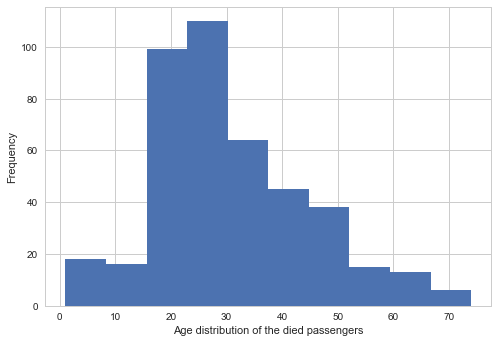

In [38]:
makehist(dead['Age'],'Age distribution of the died passengers')

It is observed that children between ages 8-20 have survived more. The correlation coefficient between age and survived is calculated.

In [39]:
age_sur = clean_data.loc[:,['Survived', 'Age']]
age_sur.corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


The correlation coefficient of "Age" with the value -0.07 indicates that it's inversely propotional to "Survived". Now, 1 tailed 2 sample t test is used to verify the speculation that the survivors are likely to be younger. The hypothes is tested at an alpha level of 0.05 (95%).
H0: Mean age of the survived population is less than that of the dead population. 
HA: Mean age of the survived population is equal or higher that of the dead population. 
(or) 
H0: µ1 = µ2 
HA: µ1 ≠ µ2

In [40]:
survived["Age"].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
dead["Age"].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [42]:
survived["Sex"].describe()

count        290
unique         2
top       female
freq         197
Name: Sex, dtype: object

In [43]:
dead["Sex"].describe()

count      424
unique       2
top       male
freq       360
Name: Sex, dtype: object

## Conclusion:

In [44]:
from scipy import stats
stats.ttest_ind(survived['Age'], dead['Age'])

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

Degree of freedom is 713, hence the t critical value is -1.646
The null hypothesis is rejected since the t statistic is less than the t critical value. It's likely that the average age of those who survived is lower than that of the died passengers.However, it cannot be proved that being young increases the chances of survival.
There may ba other questions like, would there be higher chance of survivng if the hull of the ship had been stronger, would there be a higher chance of survival, or if the cabins were open, would it increase the chances of survival...etc. With this, we found the limitation(s) of our data: a few missing values, human error in record the data, lack of passengers' information other than what is provided, for example: passengers' physical health, mental health, whether they have any children...etc.

By: B.Bharath

## References:

* Numpy Documentation https://docs.scipy.org/doc/numpy/reference/
* Pandas Documentation http://pandas.pydata.org/pandas-docs/stable/
* Kaggle Links:
    - https://www.kaggle.com/c/titanic#description
    - https://www.kaggle.com/manojsakhala/titanic-dataset-solution